# Research Questions

In [2]:
# import all packages

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy.stats

## [RQ1]
#### After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [3]:
# import the dataset df_instagram_profiles

df_instagram_profiles = pd.read_csv("~/instagram_profiles.csv", delimiter = "\t")

#### Dataset `df_instagram_profiles` description

  * `sid`: sequence id `(float)`
  * `profile_id`: instagram orofile id `(float)`
  * `profile_name`: instagram profile name `(string)`
  * `firstname_lastname`: user's firstname and lastname `(string)`
  * `description`: user's instagram profile description `(string)`
  * `following`: number of following at the moment it was visited `(float)`
  * `followers`: number of followers at the moment it was visited `(float)`
  * `n_posts`: number of posts at the moment it was visited `(float)`
  * `url`: url `(string)`
  * `cts`: Timestamp when the profile was visited `(object)`
  * `is_business_account`: Boolean variable that indicates whether that profile was makred by the owner as business account or not `{False, True}`

#### Numerical data description

In [17]:
df_instagram_profiles['sid'] = df_instagram_profiles['sid'].astype(str)
df_instagram_profiles['profile_id'] = df_instagram_profiles['profile_id'].astype(str)
df_instagram_profiles = df_instagram_profiles.astype({'following': 'int', 'followers': 'int', 'n_posts': 'int'}, errors = 'ignore')

df_instagram_profiles.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,following,followers,n_posts
count,3452771,3452771,3452771
mean,1406,4740,410
std,8113,193909,1042
min,0,0,0
25%,356,159,22
50%,754,406,120
75%,1573,974,420
max,4191080,285457645,183730


* Let's define the function `Hist(df_var, xlabel, title, col, n_bins, log_trans = False)` that returns the histogram (distribution) of the variable `df_var`.<br>
Note: We apply the **log-transformation** when the data is strongly skewed.

In [4]:
def hist(df_var, xlabel, title, col, n_bins, log_trans = False):
    df_var.plot(kind = 'hist', color = col, bins = n_bins, logy = log_trans, ec = 'black')
    plt.xlabel(xlabel, labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)

##### **Followers**

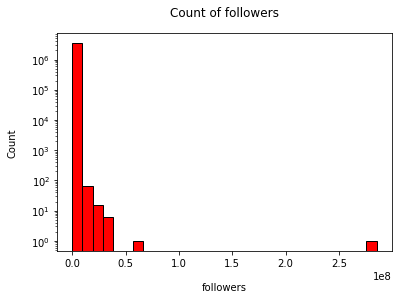

In [14]:
hist(df_instagram_profiles['followers'], "followers", "Count of followers", col = "red", n_bins = 30, log_trans = True)

* `Followers < 10,000`

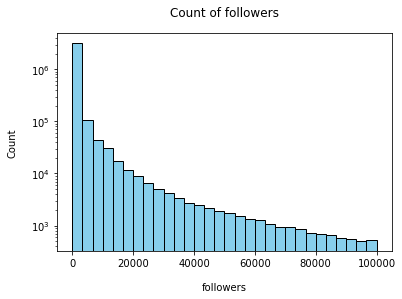

In [15]:
hist(df_instagram_profiles.followers[df_instagram_profiles['followers'] < 100000], "followers", "Count of followers", col = "skyblue", n_bins = 30, log_trans = True)

##### **Following**

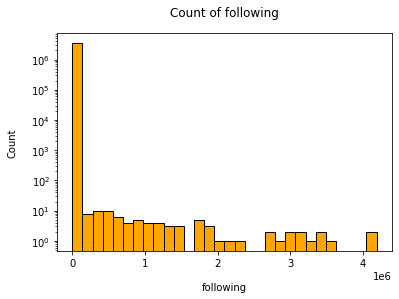

In [47]:
hist(df_instagram_profiles['following'], "following", "Count of following", col = "orange", n_bins = 30, log_trans = True)

##### **Number of posts**

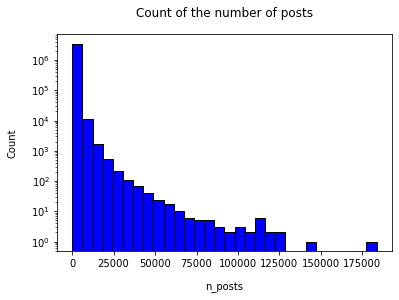

In [48]:
hist(df_instagram_profiles['n_posts'], "n_posts", "Count of the number of posts", col = "blue", n_bins = 30, log_trans = True)

#### Categorical Data description

In [25]:
df_instagram_profiles.describe(include = 'all')

# most common name is Sarah

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
count,4.509586e+06,4.477139e+06,4509586,4221121,2453590,3.452771e+06,3.452771e+06,3.452771e+06,870274,4071098,3445323
unique,NaN,NaN,4508180,3526944,2376474,NaN,NaN,NaN,841652,4062921,2
top,NaN,NaN,chkanyc,Sarah,🖤,NaN,NaN,NaN,gmail.com,2019-07-01 02:26:35.268 -0400,False
freq,NaN,NaN,4,2340,868,NaN,NaN,NaN,3437,6,2590069
mean,2.255992e+06,3.083302e+09,NaN,NaN,NaN,1.405641e+03,4.739899e+03,4.095414e+02,NaN,NaN,NaN
std,1.301807e+06,4.266575e+10,NaN,NaN,NaN,8.113473e+03,1.939087e+05,1.041940e+03,NaN,NaN,NaN
min,1.186000e+03,4.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,1.128596e+06,2.735177e+08,NaN,NaN,NaN,3.560000e+02,1.590000e+02,2.200000e+01,NaN,NaN,NaN
50%,2.255992e+06,1.649248e+09,NaN,NaN,NaN,7.540000e+02,4.060000e+02,1.200000e+02,NaN,NaN,NaN
75%,3.383389e+06,5.514691e+09,NaN,NaN,NaN,1.573000e+03,9.740000e+02,4.200000e+02,NaN,NaN,NaN


* Let's define the function `bar_binary(df_var, xlabel, title, col)` that returns the bar chart of the binary variable `df_var`.

In [28]:
def bar_binary(df_var, xlabel, title, col):
    
    count = df_var.value_counts()

    count.plot(kind = 'bar', color = col, ec = 'purple')
    plt.xlabel(xlabel, labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)

##### **Is_business_account**

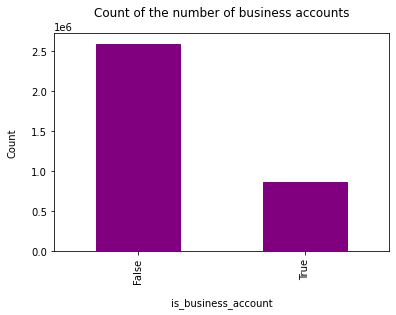

In [29]:
bar_binary(df_instagram_profiles['is_business_account'], "is_business_account", "Count of the number of business accounts", "purple")

In [30]:
# import the dataset df_instagram_locations

df_instagram_locations = pd.read_csv("~/instagram_locations.csv", delimiter = "\t")

#### Dataset `df_instagram_locations` description

* `sid`: sequence id `(string)`
* `id`: location id `(string)`
* `name`: location's name `(string)`
* `street`: street `(string)`
* `zip`: zip code `(string)`
* `city`: city name `(string)`
* `region`: region name `(string)`
* `cd`: country code `(string)`
* `phone`: phone in the same format as on Instagram `(string)`
* `aj_exact_city_match`: Instagram's internal key `{False, True}`
* `blurb`: description of the location `(string)`
* `dir_city_id`: Instagram's internal city id `(string)`
* `dir_city_slug`: city tag `(string)`
* `dir_country_id`: country id `(string)`
* `dir_country_name`: country name `(string)`
* `lat`: latitude `(float)`
* `lng`: longitute `(float)`
* `primary_alias_on_fb`: Boolean flag
* `website`: url to the website (it may contain more than one url)
* `cts`: timestamp when the location was visited `(pd object)`

#### Numerical data description

In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df_instagram_locations['sid'] = df_instagram_locations['sid'].astype(str)
df_instagram_locations['id'] = df_instagram_locations['id'].astype(str)

df_instagram_locations.describe()

,lat,lng
count,1016495.00000,1016495.00000
mean,-15.29215,34.21718
std,76.15085,22.01081
min,-179.98300,-90.00000
25%,-80.15575,29.97555
50%,-2.45000,40.67820
75%,30.71740,48.84722
max,179.99412,89.99870


##### **Latitude**

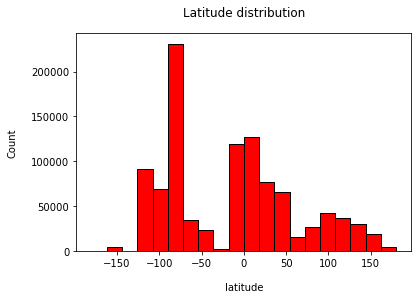

In [49]:
hist(df_instagram_locations['lat'], "latitude", "Latitude distribution", "red", n_bins = 20)

In [51]:
# most common latitude
df_instagram_locations['lat'].value_counts().idxmax()

37.6156

##### **Longitude**

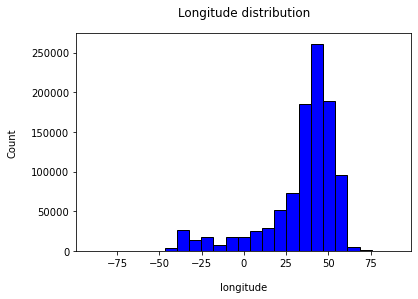

In [53]:
hist(df_instagram_locations['lng'], "longitude", "Longitude distribution", "blue", n_bins = 25)

In [16]:
# most common longitude
longitude.value_counts().idxmax()

55.7522

#### Categorical Data description

In [55]:
df_instagram_locations.describe(include = 'all')

# most commong location name is Starbucks
# most common city is New York
# most common region is eastern province
# most common country code is US
# most common website is http://www.starbucks.com/
# most common ct is 2019-05-25 23:54:48.969


,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
count,1022658,1022658,1022658,715704,715579,937166,1760,939010,601688,1000510,...,495698,495221,495628,495698,1016495.00000,1016495.00000,425531,941668,623262,1022658
unique,1022658,1022658,935776,656262,181474,118541,1743,245,577305,2,...,114996,114426,234,235,NaN,NaN,425486,833398,583671,1022298
top,719981,110296492939207,Starbucks,,10001,"New York, New York",Eastern Province,US,+44 345 748 4950,False,...,"Hells Kitchen, Manhattan",hells-kitchen-manhattan,US,United States,NaN,NaN,pandpnewcastle,-,http://www.starbucks.com/,2019-05-25 23:54:48.969
freq,1,1,1097,1652,1649,29954,4,331424,178,907651,...,1326,1326,170983,170983,NaN,NaN,2,6588,297,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-15.29215,34.21718,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.15085,22.01081,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-179.98300,-90.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-80.15575,29.97555,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.45000,40.67820,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.71740,48.84722,NaN,NaN,NaN,NaN


##### **aj_exact_city_match**

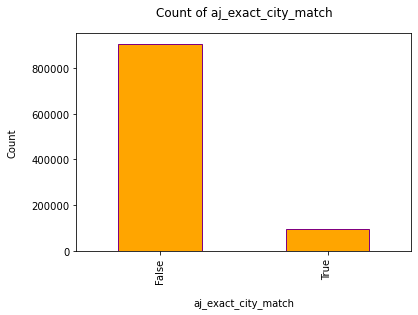

In [54]:
bar_binary(df_instagram_locations['aj_exact_city_match'], "aj_exact_city_match", "Count of aj_exact_city_match", "orange")

## [RQ2]
#### Let's explore the dataset by finding simple insights regarding the profile and posts.

In [18]:
df_instagram_profiles.shape[0] # no. rows = 4,509,586

4509586

* **Missing values**

In [21]:
df_instagram_profiles.isna().sum() 

# firstname_lastname,
# description,
# following,
# followers,
# n_posts,
# url and
# is_business_account have missing values NaN

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

* Let's remove the columns that are not useful for our purposes:
  * `description` has 2055996 missing values
  * `url` has 3639312 missing values

In [3]:
df_instagram_profiles_RQ2 = df_instagram_profiles.drop(['description', 'url'], axis = 1)
df_instagram_profiles_RQ2.shape[1]

9

* Replace `is_business_account missing` rows with `False` values

In [4]:
df_instagram_profiles_RQ2.is_business_account.fillna(False, inplace = True)

* Finally, let's remove the remaining rows with missing values

In [5]:
df_instagram_profiles_RQ2.dropna(axis = 0, how = 'any', inplace = True)
df_instagram_profiles_RQ2.shape[0] # no. rows = 3,130,712

3130712

In [25]:
df_instagram_profiles_RQ2.isna().sum()

sid                    0
profile_id             0
profile_name           0
firstname_lastname     0
following              0
followers              0
n_posts                0
cts                    0
is_business_account    0
dtype: int64

##### 2.1 Plot the number of posts for each profile in descending order

In [6]:
df_instagram_profiles_RQ2.sort_values(by = 'n_posts', ascending = False, inplace = True)

In [27]:
df_instagram_profiles_RQ2.n_posts = df_instagram_profiles_RQ2.n_posts.astype(int)
df_instagram_profiles_RQ2.n_posts

3990313    183730
2571453    142428
4338921    126340
3942129    125220
4219642    117262
            ...  
1786774         0
1711929         0
1446235         0
1446228         0
3719054         0
Name: n_posts, Length: 3130712, dtype: int64

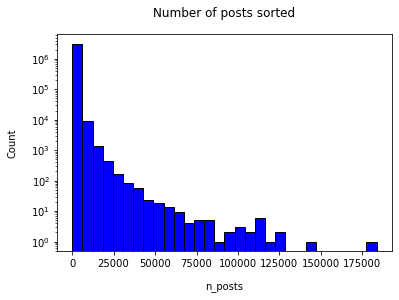

In [28]:
hist(df_instagram_profiles_RQ2['n_posts'], "n_posts", "Number of posts sorted", "blue", n_bins = 30, log_trans = True)

##### 2.2 What posts have the highest number of "likes"?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["numbr_likes", "number_comments"]
df_instagram_posts_RQ2_1 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [30]:
df_instagram_posts_RQ2_1.shape[0] # no. of rows = 42,710,197

42710197

In [31]:
df_instagram_posts_RQ2_1.isna().sum() # only 36 posts have NaN values (we can ignore them)

numbr_likes        36
number_comments    36
dtype: int64

In [3]:
# delete the NaN values

df_instagram_posts_RQ2_1.dropna(axis = 0, how = 'any', inplace = True)

In [4]:
# transform float to integer number

df_instagram_posts_RQ2_1 = df_instagram_posts_RQ2_1.astype({'numbr_likes': 'int', 'number_comments': 'int'}, errors = 'ignore')

* `most_likes` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `numbr_likes` and then taking the first 10 posts (`.head(10)`) with the most likes.

In [34]:
most_likes = df_instagram_posts_RQ2_1.sort_values(by = 'numbr_likes', ascending = False).head(10)

In [35]:
most_likes

,numbr_likes,number_comments
19624085,8822952,165886
19623988,5447066,25303
19624082,5116398,40608
19623986,4271466,30770
39701024,4264745,18691
6293907,3586546,15405
19624086,3558599,15715
19802016,3533326,59475
30850564,3340297,149489
39812576,3311246,64318


##### 2.3 What posts have the most and the least number of comments?

* `most_comments` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the most comments.

In [36]:
most_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = False).head(10)
most_comments 

,numbr_likes,number_comments
41873060,38871,488953
12164781,81523,313997
33261751,54507,257488
11149127,331703,214365
9383817,23515,189888
5427268,129258,180635
25257169,684861,173988
6220011,2224495,170836
31689573,226336,166919
14257307,169791,166198


* `least_comments` is obtained by sorting in **ascending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the least comments.

In [15]:
least_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = True).head(10)
least_comments

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80,0
709,Bx-2z8Hhk1j,29,0
289,Bxr-ibHps7V,25,0
712,Bx5mknNBLCG,35,0
713,Bx3TT5TB3Tu,188,0
286,Bxztf_xlzLh,15,0
714,Bx0fZxkh-_4,134,0
284,Bx65tHPJH2S,18,0
283,ByA02DAl8SZ,19,0
282,ByCqFD-ASgn,9,0


##### 2.4 How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "location_id"]
df_instagram_posts_RQ2_3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [23]:
# includes tagged locations means location_name not Nan

count_tagged_location = df_instagram_posts_RQ2_3.loc[df_instagram_posts_RQ2_3['location_id'].notna()].shape[0] # 29,737,425
count_no_tagged_location = len(df_instagram_posts_RQ2_3) - count_tagged_location # 12,972,772

print("The number of posts     containing tagged locations is:", count_tagged_location)
print("The number of posts not containing tagged locations is:", count_no_tagged_location)

The number of posts     containing tagged locations is: 29737425
The number of posts not containing tagged locations is: 12972772


Text(0.5, 1.05, 'Count of tagged & no-tagged locations')

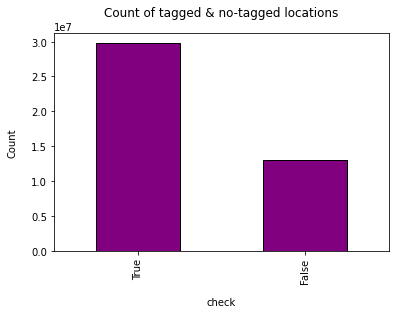

In [112]:
# plot

df_instagram_posts_RQ2_3['check'] = np.where(df_instagram_posts_RQ2_3['location_id'].notna(), True, False)

check = df_instagram_posts_RQ2_3['check']
count = check.value_counts()

count.plot(kind = 'bar', color = 'purple', ec = 'black')
plt.xlabel("check", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of tagged & no-tagged locations", y = 1.05)

##### 2.5 How many posts include only photos? How many also have videos?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "post_type"]
df_instagram_posts_RQ2_2 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [141]:
# l1: list containing only post_type == 1 (only photos)
l1 = [1]

print("The number of posts that include only photos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l1)].shape[0]) # 41,534,486

The number of posts that include only photos is 41534486


In [143]:
# l1: list containing only post_type == 3 (photos and video)
l2 = [3]

print("The number of posts that include both photos and videos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l2)].shape[0]) # 40,943

The number of posts that include both photos and videos is 40943


##### f) What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

* **Note**: the missing values of the `is_business_account` variable were substituted with `False`. So, the percentages may be different wrt just eliminating the missing values for that column.

In [138]:
# Percentage of business accounts & non-business accounts

import os

count_business_accounts = df_instagram_profiles.loc[df_instagram_profiles['is_business_account'] == True].shape[0]
percentage_business_accounts = count_business_accounts/len(df_instagram_profiles)

a = "Percentage of business accounts: " + '{0:.2%}'.format(percentage_business_accounts)
b = "Percentage of non-business accounts: " + '{0:.2%}'.format(1 - percentage_business_accounts)

print(os.linesep.join([a, b])) # 18.97%

Percentage of business accounts: 18.97%
Percentage of non-business accounts: 81.03%


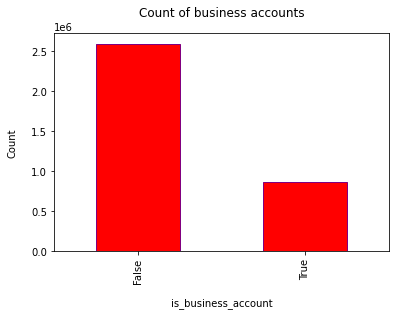

In [77]:
# plot of percentage of business & non-business accounts

bar_binary(df_instagram_profiles['is_business_account'], "is_business_account", "Count of business accounts", "red")

## [RQ3]
#### Now it's important to understand the most common times in which users publish their posts

##### 3.1 What is the most common time in which users publish their posts?

* Let's import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [4]:
fields = ["profile_id", "cts"]
df_instagram_posts_RQ3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [5]:
# Divide dataset into chunks of 5,000,000 rows

chunk_list = []
for i in range(0, len(df_instagram_posts_RQ3), 5000000):
    chunk = df_instagram_posts_RQ3[i:i+5000000]
    chunk_list.append(chunk)

* Then we convert the `cts` column from object type to `datetime`. Then we create two new columns:
  * `cts_time`: in the format `hh:mm:ss`. For instance, `20:00:00`
  * `hour`: in the format `hh`. For instance, `20`<br>
  Finally we append the chunks to a new list named `chunk_list_new`.

In [6]:
# convert string (object type) to datetime
# Then, get only time from cts (we are not interested in the dates but only in the time)

chunk_list_new = []
for chunk in chunk_list:
    chunk_copy = chunk.copy()
    chunk_copy['cts_time'] = pd.to_datetime(chunk['cts']).dt.time
    chunk_copy['hour'] = pd.to_datetime(chunk['cts']).dt.hour
    chunk_list_new.append(chunk_copy)

* We group by `cts_time` and `hour` by chunks and obtain two new lists `chunk_list_new1` and `chunk_list_new2`.

In [40]:
# group by cts_time

chunk_list_new1 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('cts_time').size().reset_index(name='counts')
    chunk_list_new1.append(chunk)

In [42]:
# group by hour

chunk_list_new2 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('hour').size().reset_index(name='counts')
    chunk_list_new2.append(chunk)

* We concatenate the chunks and obtain two dataframes `data` and `data2`.
  * `data` contains `cts_time`.
  * `data2` contains `hour`.

In [43]:
# Concatenate chunks, group by cts_time (and hour) and add up counts

data  = pd.concat(chunk_list_new1).groupby(['cts_time']).sum().reset_index()
data2 = pd.concat(chunk_list_new2).groupby(['hour']).sum().reset_index()
data2.hour = data2.hour.astype(int)

##### The most common time(s) in which users publish their posts

In [44]:
count = data.counts.value_counts(ascending = True).values[0]
data.sort_values(by = 'counts', ascending = False).head(count) # 21:00:09

,cts_time,counts
75609,21:00:09,928


In [21]:
print("The average number of times each cts_time is present in the dataset:", int(np.mean(data.counts)))
print("The median  number of times each cts_time is present in the dataset:", int(np.median(data.counts))) 
print("The maximum number of times each cts_time is present in the dataset:", int(np.max(data.counts)))
print("The minimum number of times each cts_time is present in the dataset:", int(np.min(data.counts)))
print("People post 47.5% more often at 21:00:09 wrt the other times")

The average number of times each cts_time is present in the dataset: 487
The median  number of times each cts_time is present in the dataset: 494
The maximum number of times each cts_time is present in the dataset: 928
The minimum number of times each cts_time is present in the dataset: 223


##### The most common hour(s) in which users publish their posts

In [45]:
count2 = data2.counts.value_counts(ascending = True).values[0]
data2.sort_values(by = 'counts', ascending = False).head(count2) # 21:00:09

,hour,counts
19,19,2499758


In [25]:
print("The average number of times each hour is present in the dataset:", int(np.mean(data2.counts)))
print("The median  number of times each hour is present in the dataset:", int(np.median(data2.counts))) 
print("The maximum number of times each hour is present in the dataset:", int(np.max(data2.counts)))
print("The minimum number of times each hour is present in the dataset:", int(np.min(data2.counts)))
print("People post 29% more in the time slot (19:00-19:59) wrt the other time slots")

The average number of times each hour is present in the dataset: 1779452
The median  number of times each hour is present in the dataset: 1779408
The maximum number of times each hour is present in the dataset: 2499758
The minimum number of times each hour is present in the dataset: 1011923
People post 29% more in the time slot (19:00-19:59) wrt the other time slots


##### 3.2 Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [8]:
def time_intervals(data, time, time_intervals_list, title):
    
    time_results = {}
    for slot in time_intervals_list:
        result = len(data[(time >= slot[0]) &
                                  (time < slot[1])])
        time_results[str(slot)] = result
    
    plt.bar(list(time_results.keys()), time_results.values(), color = 'blue', ec = 'black', width = 0.8)
    plt.xlabel("time slots", labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)
    plt.show() 

##### 3.3 Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

In [7]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]

In [7]:
# concatenate the chunks

data2 = pd.concat(chunk_list_new)

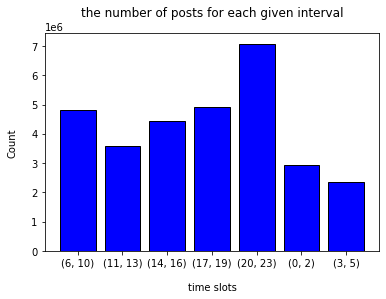

In [19]:
time_intervals(data2, data2.hour, slots, title = "the number of posts for each given interval")

## [RQ8]

#### Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

##### 8.1 Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [5]:
# dataset containing the instagram_posts's numbr_likes and number_comments columns

df_instagram_posts_RQ8_1 = df_instagram_posts_RQ2_1
len(df_instagram_posts_RQ8_1)

42710161

* Below you can find a scatterplot of the first 1,000,000 observations (for computational reasons) of the `df_instagram_posts_RQ8_1` dataframe. Unfortunately, our data is full of outliers that squash the plot to the bottom-left rendering it difficult to interpret the results and study the relationship between `numbr_likes` and `number_comments`.

Text(0.5, 1.05, 'Scatterplot of number of likes against number of comments')

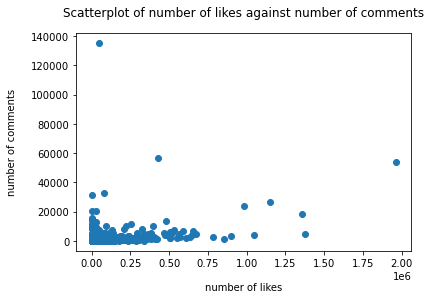

In [38]:
# sample scatterplot 

sample_RQ8 = df_instagram_posts_RQ8_1.head(1000000)

plt.scatter(sample_RQ8['numbr_likes'], sample_RQ8['number_comments'])
plt.xlabel("number of likes", labelpad = 14)
plt.ylabel("number of comments", labelpad = 14)
plt.title("Scatterplot of number of likes against number of comments", y = 1.05)

# the plot is squashed by the outliers

* However, it can be seen that the correlation between `numbr_likes` and `number_comments` is approximately equal to `37.5%` indicating a moderate positive association between the two variables. Therefore we can deduce that, generally, a higher number of likes implies also a higher number of comments.

In [6]:
print(df_instagram_posts_RQ8_1.corr())

                 numbr_likes  number_comments
numbr_likes         1.000000         0.374453
number_comments     0.374453         1.000000


##### **Some additional statistics**

In [46]:
print("The maximum number of likes is:", int(max(df_instagram_posts_RQ8_1['numbr_likes'])))
print("The minimum number of likes is:", int(min(df_instagram_posts_RQ8_1['numbr_likes'])))
print("The mean    number of likes is:", int(np.mean(df_instagram_posts_RQ8_1['numbr_likes']))) # mean is influenced
print("The median  number of likes is:", int(np.median(df_instagram_posts_RQ8_1['numbr_likes'])))

The maximum number of likes is: 8822952
The minimum number of likes is: 0
The mean    number of likes is: 283
The median  number of likes is: 46


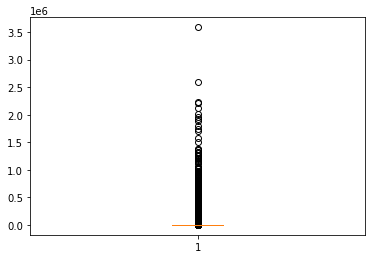

In [68]:
plt.boxplot(df_instagram_posts_RQ8_1['numbr_likes']);

In [42]:
print("The maximum number of comments is:", int(max(df_instagram_posts_RQ8_1['number_comments'])))
print("The minimum number of comments is:", int(min(df_instagram_posts_RQ8_1['number_comments'])))
print("The mean    number of comments is:", int(np.mean(df_instagram_posts_RQ8_1['number_comments']))) # mean is influenced
print("The median  number of comments is:", int(np.median(df_instagram_posts_RQ8_1['number_comments'])))

The maximum number of comments is: 488953
The minimum number of comments is: 0
The mean    number of comments is: 7
The median  number of comments is: 2


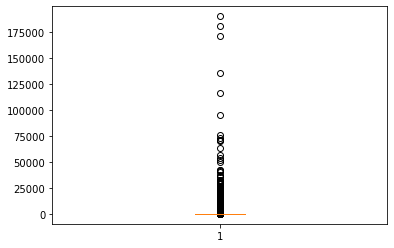

In [66]:
plt.boxplot(df_instagram_posts_RQ8_1['number_comments']); # the box plots are very squashed => there are many outliers

As can be seen from the boxplots and the summary statistics on the `numbr_likes` and `number_comments`, the data is **strongly** skewed and contains a lot of outliers.
* The black circles in the `boxplots` show the number of outliers.
* The summary statistics show the divergences between maximum (number of likes and comments) and their mean value.

##### 8.2 Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice

In [11]:
# dataset containing the instagram_posts's 

df_instagram_posts_RQ8_2 = pd.concat(chunk_list_new)[['hour']]

* We work in chunks for both dataframes `df_instagram_posts_RQ8_1` and `df_instagram_posts_RQ8_2`.

In [13]:
# Let's work in chunks

chunk_list_RQ8_1 = []
for i in range(0, len(df_instagram_posts_RQ8_1), 5000000):
    chunk = df_instagram_posts_RQ8_1[i:i+5000000]
    chunk_list_RQ8_1.append(chunk)
    
chunk_list_RQ8_2 = []
for i in range(0, len(df_instagram_posts_RQ8_2),b 5000000):
    chunk = df_instagram_posts_RQ8_2[i:i+5000000]
    chunk_list_RQ8_2.append(chunk)

* Then we concatenate the columns by chunks and append the chunks to a new list called `chunk_list_RQ8_3`.

In [16]:
chunk_list_RQ8_3 = []
for i in range(0, len(df_instagram_posts_RQ8_2), 5000000):
    chunk = pd.concat([df_instagram_posts_RQ8_2[i:i+5000000], df_instagram_posts_RQ8_1[i:i+5000000]], axis = 1)
    chunk_list_RQ8_3.append(chunk)

* We concatenate the chunks in `chunk_list_RQ8_3` and group by the column `hour` aggregating on the mean of `numbr_likes` and `number_comments`. We obtain a new dataframe called `df_instagram_posts_RQ8_grouped`.

In [19]:
df_instagram_posts_RQ8_grouped = pd.concat(chunk_list_RQ8_3).groupby('hour', as_index=False).mean()
df_instagram_posts_RQ8_grouped.hour = df_instagram_posts_RQ8_grouped.hour.astype(int)

In [25]:
df_instagram_posts_RQ8_grouped

,hour,numbr_likes,number_comments
0,0,262.135037,7.384589
1,1,266.617649,7.683354
2,2,278.816228,7.772853
3,3,271.618603,7.325271
4,4,263.379649,6.930650
5,5,261.192717,6.683866
6,6,253.587895,6.723536
7,7,262.929015,7.026733
8,8,264.922111,7.710607
9,9,269.073676,7.393673


#### `1st statistics: correlation`

In [21]:
# Let's look at the correlation between the three variables

print(df_instagram_posts_RQ8_grouped.corr())

                     hour  numbr_likes  number_comments
hour             1.000000     0.514339         0.279257
numbr_likes      0.514339     1.000000         0.804829
number_comments  0.279257     0.804829         1.000000


##### `Correlation results comments`

* `hour` and `numbr_likes` have a moderate-strong positive correlation (**51.4%**)
* `hour` and `number_comments` have a weak-moderate positive correlation (**27.9%**)

The time in which you post is more correlated to the number of likes wrt the number of comments a post gets.<br>
We can also see that the number of likes and the number of comments are strongly correlated.

#### `2nd statistics: linear regression (p-value)`

* The `p-value` for each term tests the null hypothesis H₀ that the coefficient is equal to zero. So, if the p-value is less than a specified `significance level α` (usually 0.05), we can reject the null hypothesis H₀. For small p-values we can state that the predictor variable does give a meaningul addition to the model: **the values of the predictor variable are related to the values of the response variable**.

In [22]:
# Simple linear regression
# time ~ number_likes
# time ~ number_comments

number_likes = df_instagram_posts_RQ8_grouped.numbr_likes
number_comments = df_instagram_posts_RQ8_grouped.number_comments
time = df_instagram_posts_RQ8_grouped.hour

result = scipy.stats.linregress(number_likes, time)
result2 = scipy.stats.linregress(number_comments, time)

In [23]:
print("The p-value for model 1 is:", result.pvalue)
print("the p-value for model 2 is:", result2.pvalue) # p-value == 0.0 implying that number_comments is statistically significant in predicting number_likes and viceversa 

# the number of likes is significant while the number of comments is not

The p-value for model 1 is: 0.010129899606811663
the p-value for model 2 is: 0.18633045092180706


##### `Linear Regression comments`

According to the **`p-value`** for the two models, there seems to be a <b>significant relationship between the time a user posts and the number of likes the post gets</b>. In fact, the `p-value = 0.01 < 0.05`. On the contrary, there is no significant relationship between the time a user posts and the number of comments as the `p-value = 0.19 > 0.05`. We can also point out that the correlation between `hour` and `numbr_likes` is approximately twice as big as the correlation between `hour` and `number_comments`.

## Bonus Points

##### a) Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

* First let's divide `instagram_profiles.csv` into two subsets:
  1. The first `top10_followers` containing the top 10% regarding the number of followers.
  2. The second `rest_followers` containing the remaining 90% of profiles.

In [9]:
# top10_followers

df_instagram_profiles_bp = df_instagram_profiles.copy()
df_instagram_profiles_bp.sort_values(by = 'followers', ascending = False, inplace = True)

In [11]:
top10_followers = df_instagram_profiles_bp.head(int(0.1*len(df_instagram_profiles_bp)))

In [12]:
rest_followers = df_instagram_profiles_bp.iloc[len(top10_followers):]

Let's do some work on the `instagram_post.csv`.

* We recover the list of dataset chunks `chunk_list_new` used in question RQ3. Then, we group by `profile.id` and sum over `hour` creating a new variable called `hours_sum`. We append the new chunks to a new list called `chunk_list_new3`. Lastly, we concatenate the chunks grouping by `profile_id` and summing across the `hours_sum` column therefore obtaining the `data3` dataframe.

In [13]:
chunk_list_new3 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['hour'].agg({'hours_sum': 'sum'})
    chunk_list_new3.append(chunk)
    
data3 = pd.concat(chunk_list_new3).groupby('profile_id', as_index=False)['hours_sum'].sum()

* We group by `profile.id` and count the number of profile ids in each group creating a new column called `profile_id_count`. We append the new chunks to a new list called `chunk_list_new4`. Lastly, we concatenate the chunks grouping them by `profile_id` and summing across the `profile_id_count` column therefore obtaining the `data4` dataframe.

In [14]:
# get instagram_posts dataset and group by profile id and average across hour (time)

chunk_list_new4 = []
for chunk in chunk_list_new:
    chunk = chunk.groupby('profile_id', as_index=False)['profile_id'].agg({'profile_id_count': 'count'})
    chunk_list_new4.append(chunk)
    
data4 = pd.concat(chunk_list_new4).groupby('profile_id', as_index=False)['profile_id_count'].sum()

* We create a new dataframe `df_bp_1` by concatenating the columns in `data3` and `data4`. 

In [15]:
# Concatenate the datasets 

df_bp_1 = pd.concat([data3, data4['profile_id_count']], axis = 1)

* Finally, we create a new column `average_hour` that is calculated by dividing the `hours_sum` by the `profile_id_count`.

In [16]:
# Create a new column containing the average hour 

df_bp_1['average_hour'] = df_bp_1['hours_sum']/df_bp_1['profile_id_count']

In [17]:
df_bp_1

,profile_id,hours_sum,profile_id_count,average_hour
0,3.000000e+00,153.0,14,10.928571
1,4.000000e+00,404.0,37,10.918919
2,1.100000e+01,29.0,2,14.500000
3,1.200000e+01,5.0,1,5.000000
4,1.400000e+01,17.0,1,17.000000
...,...,...,...,...
11833760,9.001013e+13,134.0,10,13.400000
11833761,9.001013e+13,4.0,1,4.000000
11833762,9.001013e+13,42.0,2,21.000000
11833763,9.001013e+13,7.0,1,7.000000


##### **Time interval distribution regarding the top 10% users with the highest number of followers**

In [36]:
# Let's start with top10 followers

top10_followers.isna().sum()
top10_followers_1 = top10_followers.copy()
top10_followers_1.dropna(subset = ['profile_id'], inplace = True)

* We perform an inner merge `top10_followers` with `df_bp_1` on `profile_id`. So, we keep only those rows (profiles) that are present in both dataframes.

In [37]:
# keep only profile ids that are in both datasets

top10_followers_merged = pd.merge(top10_followers_1, df_bp_1, on='profile_id', how='inner')

* We use the function `time_intervals` defined in question `RQ3` to plot the distribution of the time intervals. Therefore, we count the number of `average_hour` occurrences there are for each time interval and we visualize the results.

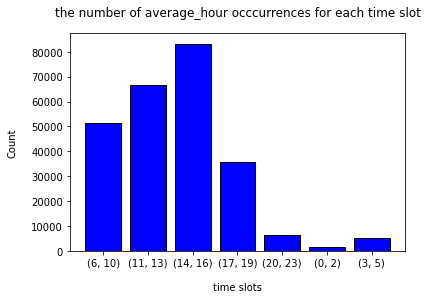

In [42]:
time_intervals(top10_followers_merged, top10_followers_merged.average_hour, slots, title = "the number of average_hour occcurrences for each time slot")

* **The mean of time intervals** is

In [43]:
np.mean(top10_followers_merged.average_hour)

13.236959396872

##### **Time interval distribution regarding the remaining 90% of users**

* We perform an inner merge `rest_followers` with `df_bp_1` on `profile_id`. So, we keep only those rows (profiles) that are present in both dataframes.

In [20]:
# Rest 90% of profile ids

rest_followers_1 = rest_followers.copy()
rest_followers_1.dropna(subset = ['profile_id'], inplace = True)

In [ ]:
rest_followers_merged = pd.merge(rest_followers_1, df_bp_1, on='profile_id', how='inner')

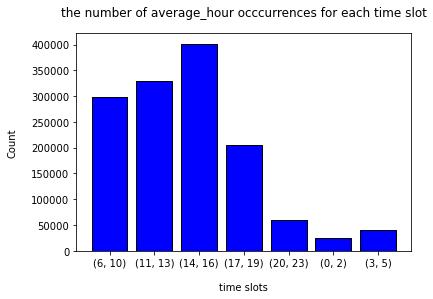

In [38]:
time_intervals(rest_followers_merged, rest_followers_merged.average_hour, slots, "the number of average_hour occcurrences for each time slot")

* **The mean of time intervals** is

In [39]:
np.mean(rest_followers_merged.average_hour)

13.102672633361614

##### `Conclusions`

It can clearly be seen that the distribution of the time intervals for the bottom 90% Instagram users (`rest_followers`) in terms of number of followers is similar to the one obtained in question `RQ3`. This could be explained by the fact that the majority (90%) of the dataset used in questin RQ3 is also present in rest_followers.

While the distribution of the time intervals for the top 10% Instagram users (`top10_followers`) is very different wrt the one obtained in question `RQ3`. The histogram is far more skewed to the left, implying that <b>the most followed users tend to post earlier in the day (6 AM - 4 PM) and especially in the 2PM-4PM slot instead of in the evening (5PM-11PM) like the majority of the sampled Instagram users.</b>
So, if you want to be more successful on Instagram, you should post in the morning and early afternoon!